<a href="https://colab.research.google.com/github/Pestrdan/netology_research/blob/main/STPY_38_HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [ ]:
df = pd.read_csv('water.csv')

**Задание 1**

In [ ]:
df.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


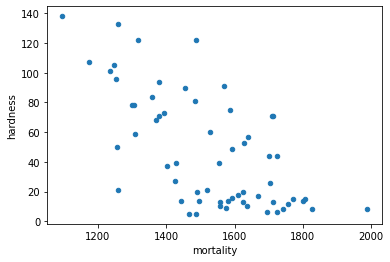

In [ ]:
# визуализируем взаимосвязь между жёсткостью воды и средней годовой смертностью
df.plot(kind='scatter', x='mortality', y='hardness')

In [ ]:
# считаем коэф. корреляции Пирсона
df[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.654849
hardness,-0.654849,1.000000


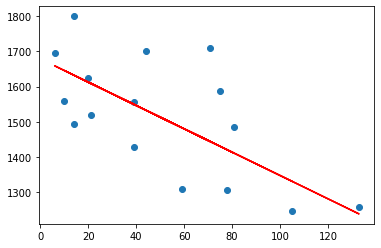

In [ ]:
# расчет при помощи sklearn
X = df[['hardness']]
y = df['mortality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train.shape
X_test.shape
y_train.shape
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

In [ ]:
# коэффициент детерминации
model.score(X_test, y_test)

0.410213439338294

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


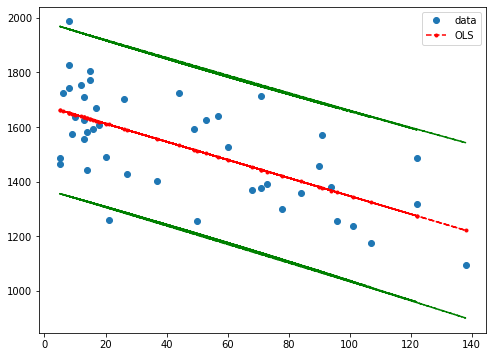

In [ ]:
# расчет при помощи statsmodels
X_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_const)
results = model.fit()
prstd, iv_l, iv_u = wls_prediction_std(results)
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(X_const.iloc[:, 1], y_train, 'o', label="data")
ax.plot(X_const.iloc[:, 1], results.fittedvalues, 'r--.', label="OLS")
ax.plot(X_const.iloc[:, 1], iv_u, 'g--')
ax.plot(X_const.iloc[:, 1], iv_l, 'g--')
ax.legend(loc='best')

In [ ]:
# коэффициент детерминации  по statsmodels
print('R2: ', results.rsquared)

R2:  0.4328741477401241


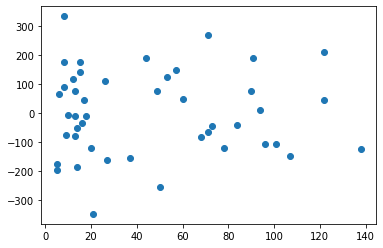

In [ ]:
# посмотрим на остатки
plt.scatter(X_const.iloc[:, 1], results.resid)

Выводы:

1. Корреляция обратнозависимая и слабовыраженная (-0,65)
2. Коэффициент детерминации при построении регрессии по sklearn - 0,41, statsmodels - 0,43. В обоих случаях довольно низкий, чтобы говорить об эффективности модели

**Задание 2**

In [ ]:
df_south = df.loc[df.location == 'South']
df_north = df.loc[df.location == 'North']

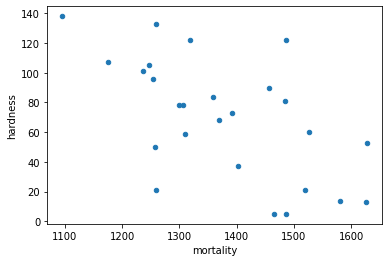

In [ ]:
# взаимосвязь между жёсткостью воды и средней годовой смертностью на юге
df_south.plot(kind='scatter', x='mortality', y='hardness')

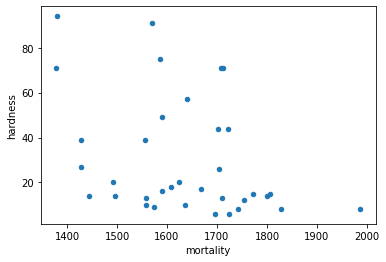

In [ ]:
# взаимосвязь между жёсткостью воды и средней годовой смертностью на севере
df_north.plot(kind='scatter', x='mortality', y='hardness')

In [ ]:
# считаем коэф. корреляции Пирсона на юге
df_south[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.602153
hardness,-0.602153,1.000000


In [ ]:
# считаем коэф. корреляции Пирсона на севере
df_north[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.368598
hardness,-0.368598,1.000000


In [ ]:
# введем переменные для юга
X_south = df_south[['hardness']]
y_south = df_south['mortality']
X_south_train, X_south_test, y_south_train, y_south_test = train_test_split(X_south, y_south, test_size=0.25, random_state=42)

In [ ]:
# введем переменные для севера
X_north = df_north[['hardness']]
y_north = df_north['mortality']
X_north_train, X_north_test, y_north_train, y_north_test = train_test_split(X_north, y_north, test_size=0.25, random_state=42)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


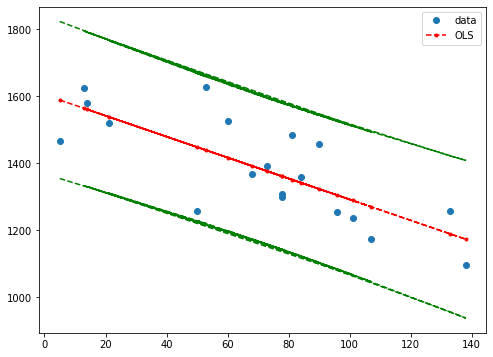

In [ ]:
# расчет регрессии при помощи statsmodels для юга

X_south_const = sm.add_constant(X_south_train)
model = sm.OLS(y_south_train, X_south_const)
results_south = model.fit()
prstd, iv_l, iv_u = wls_prediction_std(results_south)
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(X_south_const.iloc[:, 1], y_south_train, 'o', label="data")
ax.plot(X_south_const.iloc[:, 1], results_south.fittedvalues, 'r--.', label="OLS")
ax.plot(X_south_const.iloc[:, 1], iv_u, 'g--')
ax.plot(X_south_const.iloc[:, 1], iv_l, 'g--')
ax.legend(loc='best')

In [ ]:
# выведем коэффициент детерминации юга
print('R2: ', results_south.rsquared)

R2:  0.5975675834850147


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


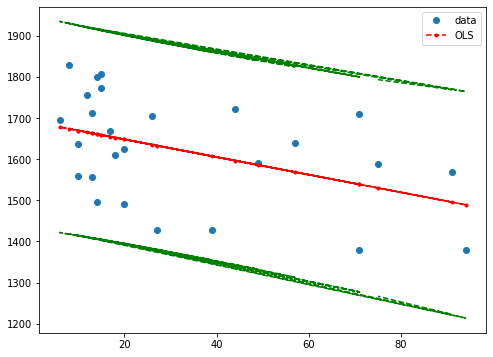

In [ ]:
# расчет регрессии при помощи statsmodelsь для севера

X_north_const = sm.add_constant(X_north_train)
model = sm.OLS(y_north_train, X_north_const)
results_north = model.fit()
prstd, iv_l, iv_u = wls_prediction_std(results_north)
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(X_north_const.iloc[:, 1], y_north_train, 'o', label="data")
ax.plot(X_north_const.iloc[:, 1], results_north.fittedvalues, 'r--.', label="OLS")
ax.plot(X_north_const.iloc[:, 1], iv_u, 'g--')
ax.plot(X_north_const.iloc[:, 1], iv_l, 'g--')
ax.legend(loc='best')

In [ ]:
# выведем коэффициент детерминации севера
print('R2: ', results_north.rsquared)

R2:  0.19980941812712927


Выводы:
1. На юге зависимость более ярковыраженная
- Коэфиициент корреляции на юге составляет -0,6, при посторении регрессионной модели коэффициент детерминации составляет 0,59
- Коэфиициент корреляции на севере составляет -0,37, при посторении регрессионной модели коэффициент детерминации составляет 0,2

2. В обоих услучаях зависимость слабая, но на севере она практически отсутствует